# Output an Image

In [ ]:
import os
import math
import numpy as np
import cupy as cp

from display_image import write_and_display

dn = os.path.join(os.path.dirname(os.getcwd()), 'kernels')
fnl = list()
fnl.append(os.path.join(dn, 'vec3.cuh'))
fnl.append(os.path.join(dn, 'render.cu'))

cuda_source = None
for fpfn in fnl:
    with open(fpfn, 'r') as f:
        cs = f.read()
    if cuda_source is None:
        cuda_source = cs
    else:
        cuda_source += cs

In [ ]:
image_width = 256
image_height = 256

cuda_source = cuda_source.replace('RTOW_WIDTH', str(image_width))
cuda_source = cuda_source.replace('RTOW_HEIGHT', str(image_height))

module = cp.RawModule(code=cuda_source)
module.compile()

In [ ]:
img_gpu = cp.empty((image_height, image_width, 3), dtype=cp.float32)
assert img_gpu.flags.c_contiguous

gpu_func = module.get_function('render')
sz_block = 32, 32
sz_grid = math.ceil(image_width / sz_block[1]), math.ceil(image_height / sz_block[0])
gpu_func(
  block=sz_block, grid=sz_grid,
  args=(img_gpu)
)
cp.cuda.runtime.deviceSynchronize()

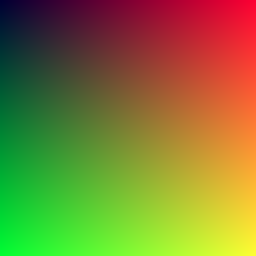

In [ ]:
img = img_gpu.get()
img8 = (img * np.float32(255.99)).astype(np.uint8)
write_and_display(img8)